# GET DATA

In [1]:
!pip install networkx==2.6.2

In [2]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=137d202ae51c3d4c13fd63af1bd875b39a7d246e5138481c5965e6b7cd2de245
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [3]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

In [4]:
#https://pt.wikipedia.org/wiki/Google
SEED = "Universidade Federal do Rio Grande do Norte".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", 
         "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv",
         "Proc Natl Acad Sci Usa", 
         "Bibcode",
         "Library Of Congress Control Number", 
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

In [5]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [6]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [7]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    layer, page = todo_lst[0]
    print("Could not load", page)
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Universidade Federal Do Rio Grande Do Norte
1 Academic Ranking Of World Universities
1 Administrative Divisions Of Brazil
1 Agriculture In Brazil
1 Alberto Santos-Dumont
Could not load Amazon Basin
1 Amazon Basin
1 Amazonas State University
1 Anhembi Morumbi University
1 Animal Husbandry In Brazil
1 Automotive Industry In Brazil
1 Bahia State University
1 Bibliography Of Brazil
1 Bolsa Família
1 Brazil
1 Brazil University Rankings
1 Brazilian Antarctica
1 Brazilian Armed Forces
1 Brazilian Carnival
Could not load Brazilian Naval School
1 Brazilian Naval School
1 Brazilian Art
1 Brazilian Comics
1 Brazilian Cuisine
1 Brazilian Literature
1 Brazilian Mythology
1 Brazilian Painting
1 Brazilian Real
1 Brazilian Science Fiction
1 Brazilian Sculpture
1 Brazilians
1 Brutalist Architecture
1 Caicó
1 Catholic University Of Brasília
1 Catholic University Of Pelotas
1 Catholic University Of Pernambuco
1 Catholic University Of Petrópolis
1 Catholic University Of Salvador
1 Catholic University Of

In [8]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

28629 nodes, 89864 edges


In [9]:
# make a copy of raw graph
original = g.copy()

In [10]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Graduate Student', 'Graduate Students'), ('Sovereign State', 'Sovereign States'), ('Bean', 'Beans'), ('Brazil Nut', 'Brazil Nuts'), ('Cashew', 'Cashews'), ('Grape', 'Grapes'), ('Mango', 'Mangos'), ('Oat', 'Oats'), ('Onion', 'Onions'), ('Pine Nut', 'Pine Nuts'), ('Soybean', 'Soybeans'), ('Bird', 'Birds'), ('Parrot', 'Parrots'), ('Rainforest', 'Rainforests'), ('Dance', 'Dances'), ('White', 'Whites'), ('Motor Vehicle', 'Motor Vehicles'), ('Afro-Brazilian', 'Afro-Brazilians'), ('Arab Brazilian', 'Arab Brazilians'), ('Asian Brazilian', 'Asian Brazilians'), ('Bric', 'Brics'), ('Black Brazilian', 'Black Brazilians'), ('Chiefdom', 'Chiefdoms'), ('Chinese Brazilian', 'Chinese Brazilians'), ('Emerald', 'Emeralds'), ('Emerging Power', 'Emerging Powers'), ('Empanada', 'Empanadas'), ('German Brazilian', 'German Brazilians'), ('Italian Brazilian', 'Italian Brazilians'), ('Japanese Brazilian', 'Japanese Brazilians'), ('Lusophone', 'Lusophones'), ('Pardo Brazilian', 'Pardo Brazilians'), ('Polish Br

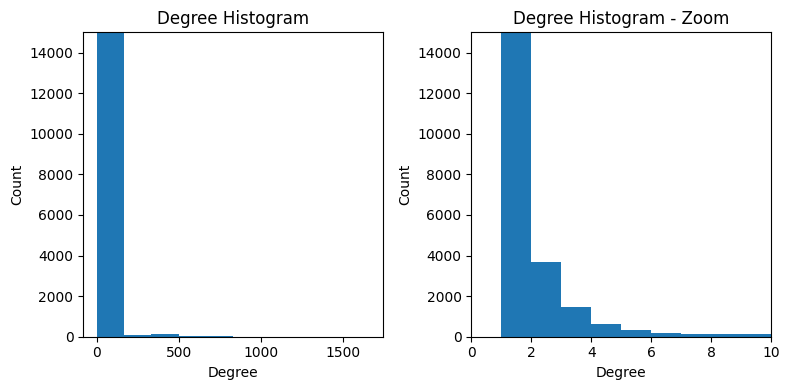

In [11]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [13]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "ufrn.graphml")

7425 nodes, 68718 edges
